In [1]:
import networkx as nx
from os.path import basename
import numpy as np
from add_weights_rf import add_weights_rf
import matplotlib.pyplot as plt
%matplotlib inline


def get_graph(filestart):
    global num,ext
# Get next file in series
    ext = '%.5d' % num
    filename = filestart + ext + '.graphml'
    try:
        open(filename)
    except IOError as e:
        pass      
    G = nx.read_graphml(filename)
    num = num + 1
#
    G = add_weights_rf(G,threshold=0.6)
    return G

/Users/macker/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
num = 0  # This is the number of graphml to start analysis on
end = 290 # This is the number to end analytics e,g., 500 would be 500 time series of graphmls.

filestart = "scenarios/48topo_static/48node_"
scenario = basename(filestart)
avg_clust =  []
avg_clust_weights = []
assortativity_graph = []
assortativity_graph_weights = []
fiedler=[]

estrada_index = []
centrality = []
#avg_deg_graph_weights = []
for i in range(end):
    G=get_graph(filestart)
#Clustering
    avg_clust.append(nx.average_clustering(G, nodes=None, weight=None, count_zeros=True))
    avg_clust_weights.append(nx.average_clustering(G, nodes=None, weight="weight", count_zeros=True))
#Assortativity
    assortativity_graph.append(nx.degree_pearson_correlation_coefficient(G, x='out', y='in', weight=None, nodes=None))    
    assortativity_graph_weights.append(nx.degree_pearson_correlation_coefficient(G, x='out', y='in', weight="weight", nodes=None))
#Estrada Index
    estrada_index.append(nx.estrada_index(G))
#Estrada Index
    fiedler.append(nx.algebraic_connectivity(G, weight='weight', normalized=False, tol=1e-8,
                           method='tracemin'))    
#CurrentFlow Betweenness
# Doing 2D array as list of list probably better to do directly with numpy arrays
    templist = []
    cent_list = []
    cent_dict = nx.load_centrality(G, normalized=True)
    templist = sorted(cent_dict.items())
#Use ordered tuple list by keys because dictionary ordering seems to be non-guaranteed
# This way each node result will be ordered in nodename order each iteration
# use of imshow
    for t in templist:
        cent_list.append(t[1])
    centrality.append(cent_list)
#print current_cent

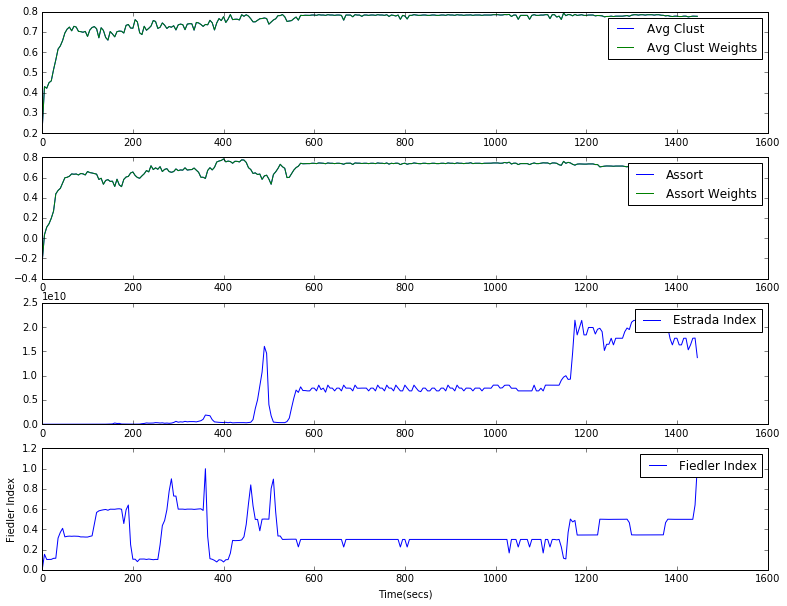

In [3]:
#Plotting Section
# Two subplots, the axes array is 1-d
f, ax = plt.subplots(4,figsize=(13,10))
#f(figsize=(12,8), dpi=200)
ax[0].plot(range(0,end*5,5),avg_clust, label = "Avg Clust")
ax[0].plot(range(0,end*5,5),avg_clust_weights, label = "Avg Clust Weights")
ax[0].legend()

ax[1].plot(range(0,end*5,5),assortativity_graph,label = "Assort")
ax[1].plot(range(0,end*5,5),assortativity_graph_weights,label = "Assort Weights")
plt.xlabel("Time(secs)")
plt.ylabel("Avg Assortativity")
ax[1].legend()

ax[2].plot(range(0,end*5,5),estrada_index,label = "Estrada Index")
plt.xlabel("Time(secs)")
plt.ylabel("Estrada Index")
ax[2].legend()

ax[3].plot(range(0,end*5,5),fiedler,label = "Fiedler Index")
plt.xlabel("Time(secs)")
plt.ylabel("Fiedler Index")
ax[3].legend()

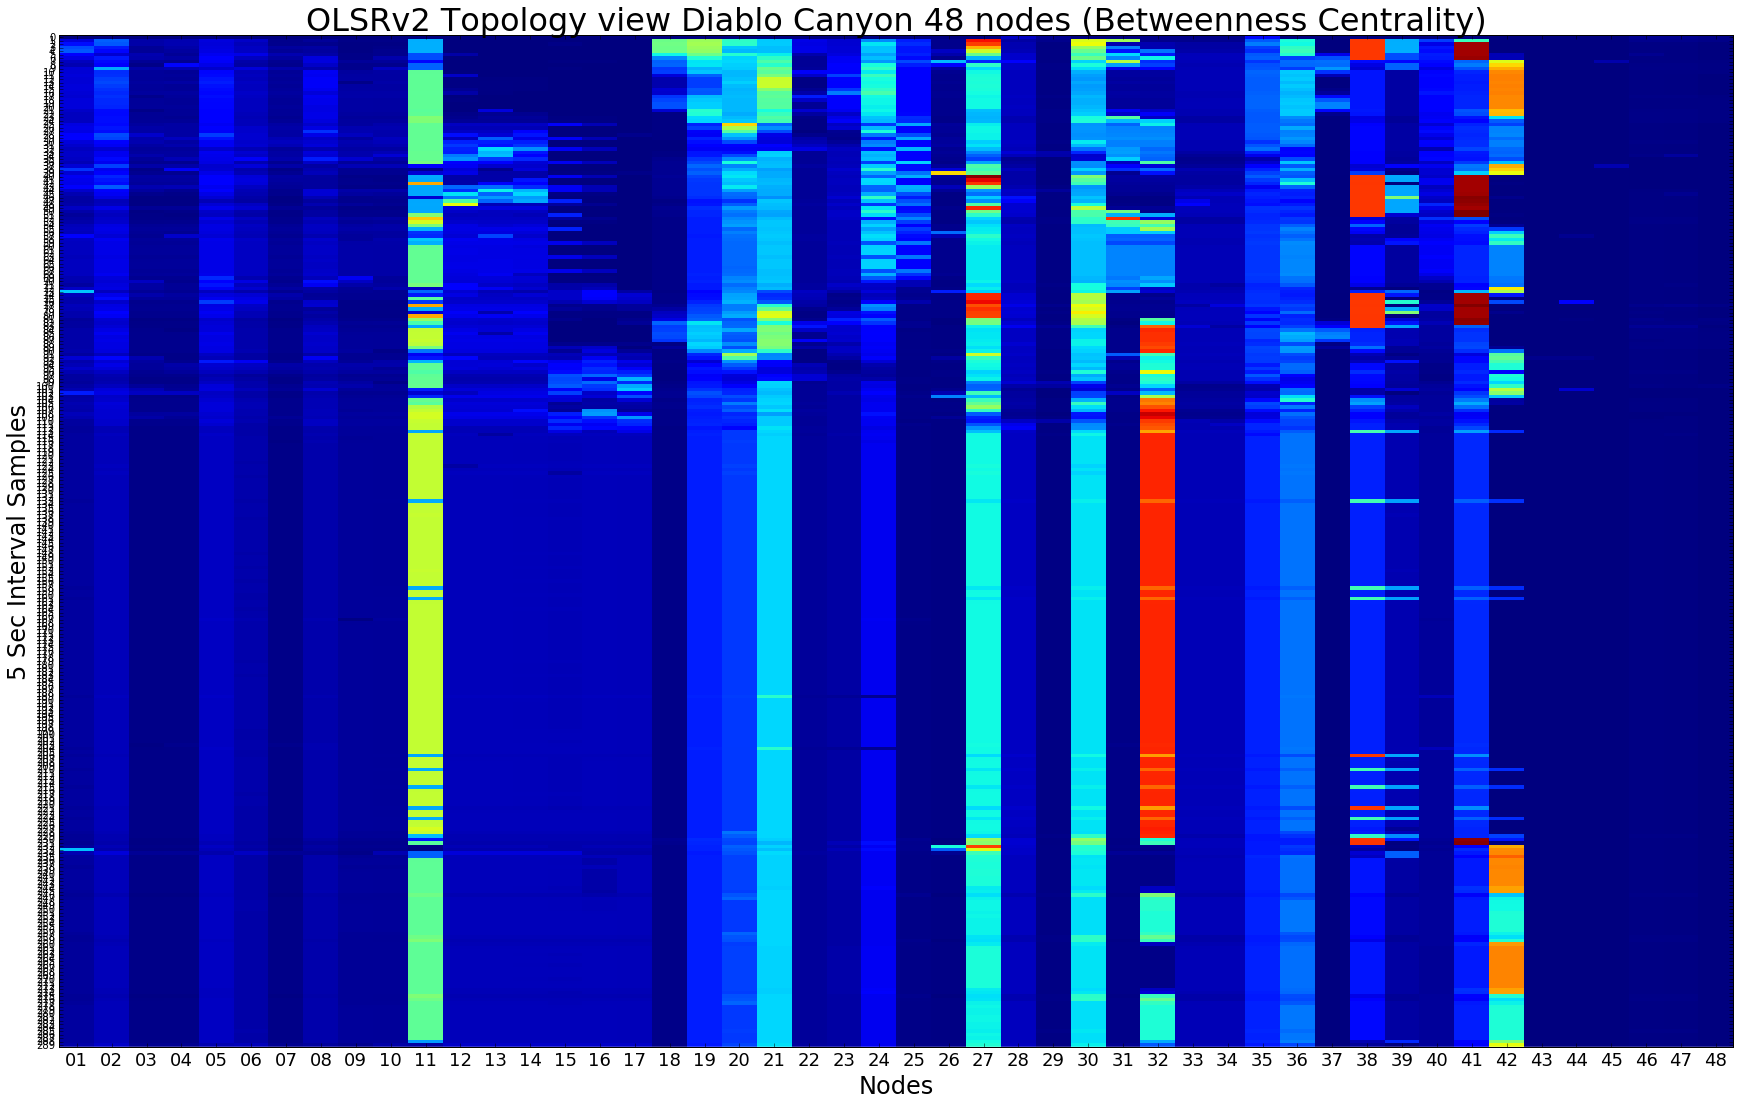

In [4]:
from matplotlib.ticker import MultipleLocator, FormatStrFormatter

majorLocator = MultipleLocator(60)
majorFormatter = FormatStrFormatter('%d')
minorLocator = MultipleLocator(10)

fig, ax = plt.subplots(figsize=(30,60))



nodenames=[]
for name in sorted(G.nodes()):
    nodenames.append(name[-6:-4])
#fig = plt.figure(figsize=(30,60))
#plt.xticks(range(len(G.nodes())),sorted(G.nodes()),size=8)
plt.xticks(range(len(G.nodes())),nodenames,fontsize=18)
#plt.yticks(range(0,end*5,5),size=18)
im=plt.imshow(centrality,aspect=0.1,interpolation='None')
plt.ylabel("5 Sec Interval Samples",fontsize=24)
plt.xlabel("Nodes",fontsize=24)
#savefig("current.svg",format="svg")
ax.yaxis.set_major_locator(majorLocator)
ax.yaxis.set_major_formatter(majorFormatter)
ax.set_yticks(range(0,end))
# for the minor ticks, use no labels; default NullFormatter
ax.yaxis.set_minor_locator(minorLocator)
plt.title("OLSRv2 Topology view Diablo Canyon 48 nodes (Betweenness Centrality)",fontsize=32)
#fig.colorbar(im, cax=ax)
plt.show()

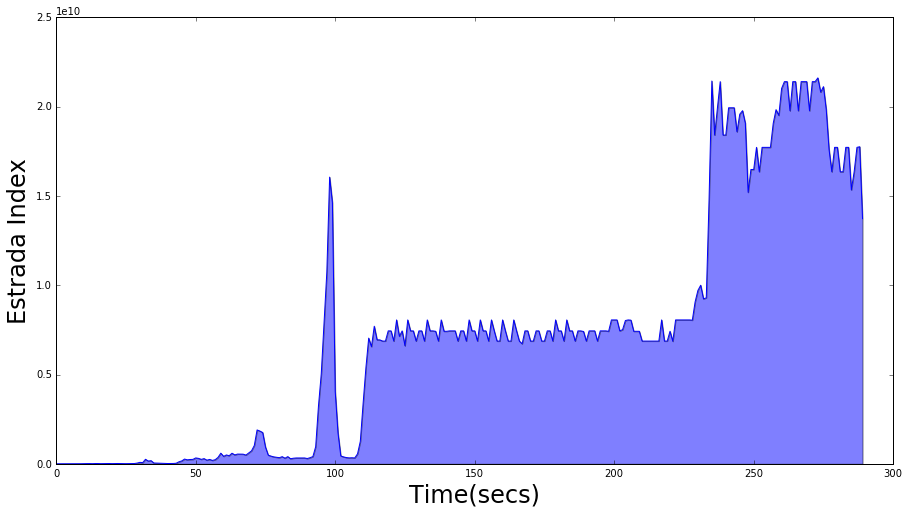

In [5]:
fig = plt.figure(figsize=(15,8), dpi=200)
plt.plot(range(0,end),estrada_index)
plt.xlabel("Time(secs)",size=24)
plt.ylabel("Estrada Index",size=24)
plt.fill_between(range(0,end),estrada_index,y2=0,alpha=0.5)

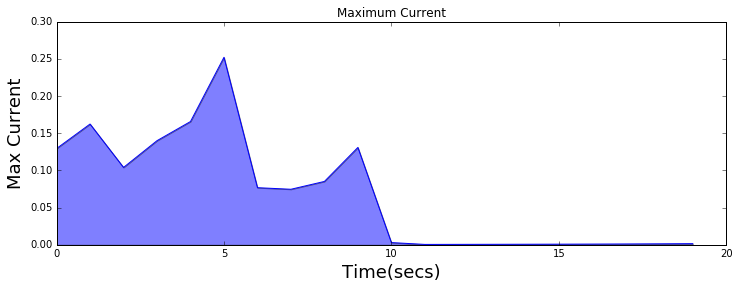

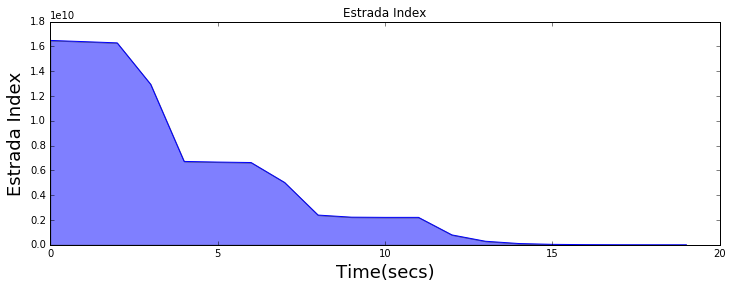

In [6]:
# Attack a network based on current flow 
#Read in a network
G = nx.read_graphml("scenarios/48topo_static/48node_00250.graphml")
G = add_weights_rf(G,threshold=0.8)
G.to_undirected()

import operator
est_array = []
max_curr = []
#get estrada index
for i in range(20):
#    print nx.estrada_index(G)
    est_array.append(nx.estrada_index(G))
    curr_dict = nx.betweenness_centrality(G, normalized=True, weight='linkLossRate')
#    print max(curr_dict.values())
    max_curr.append(max(curr_dict.values()))
    
    nodemax= max(curr_dict.iteritems(), key=operator.itemgetter(1))[0]
#    print "removing ", nodemax
    G.remove_node(nodemax)
fig = plt.figure(figsize=(12,4), dpi=200)
plt.title('Maximum Current')
plt.plot(range(0,len(max_curr)),max_curr)
plt.ylabel("Max Current",size=18)
plt.fill_between(range(0,len(max_curr)),max_curr,y2=0,alpha=0.5)
plt.xlabel("Time(secs)",size=18)
plt.show()
fig = plt.figure(figsize=(12,4), dpi=200)
plt.title('Estrada Index')
plt.plot(range(0,len(est_array)),est_array)
plt.ylabel("Estrada Index",size=18)
plt.xlabel("Time(secs)",size=18)
plt.fill_between(range(0,len(est_array)),est_array,y2=0,alpha=0.5)
plt.show()
    



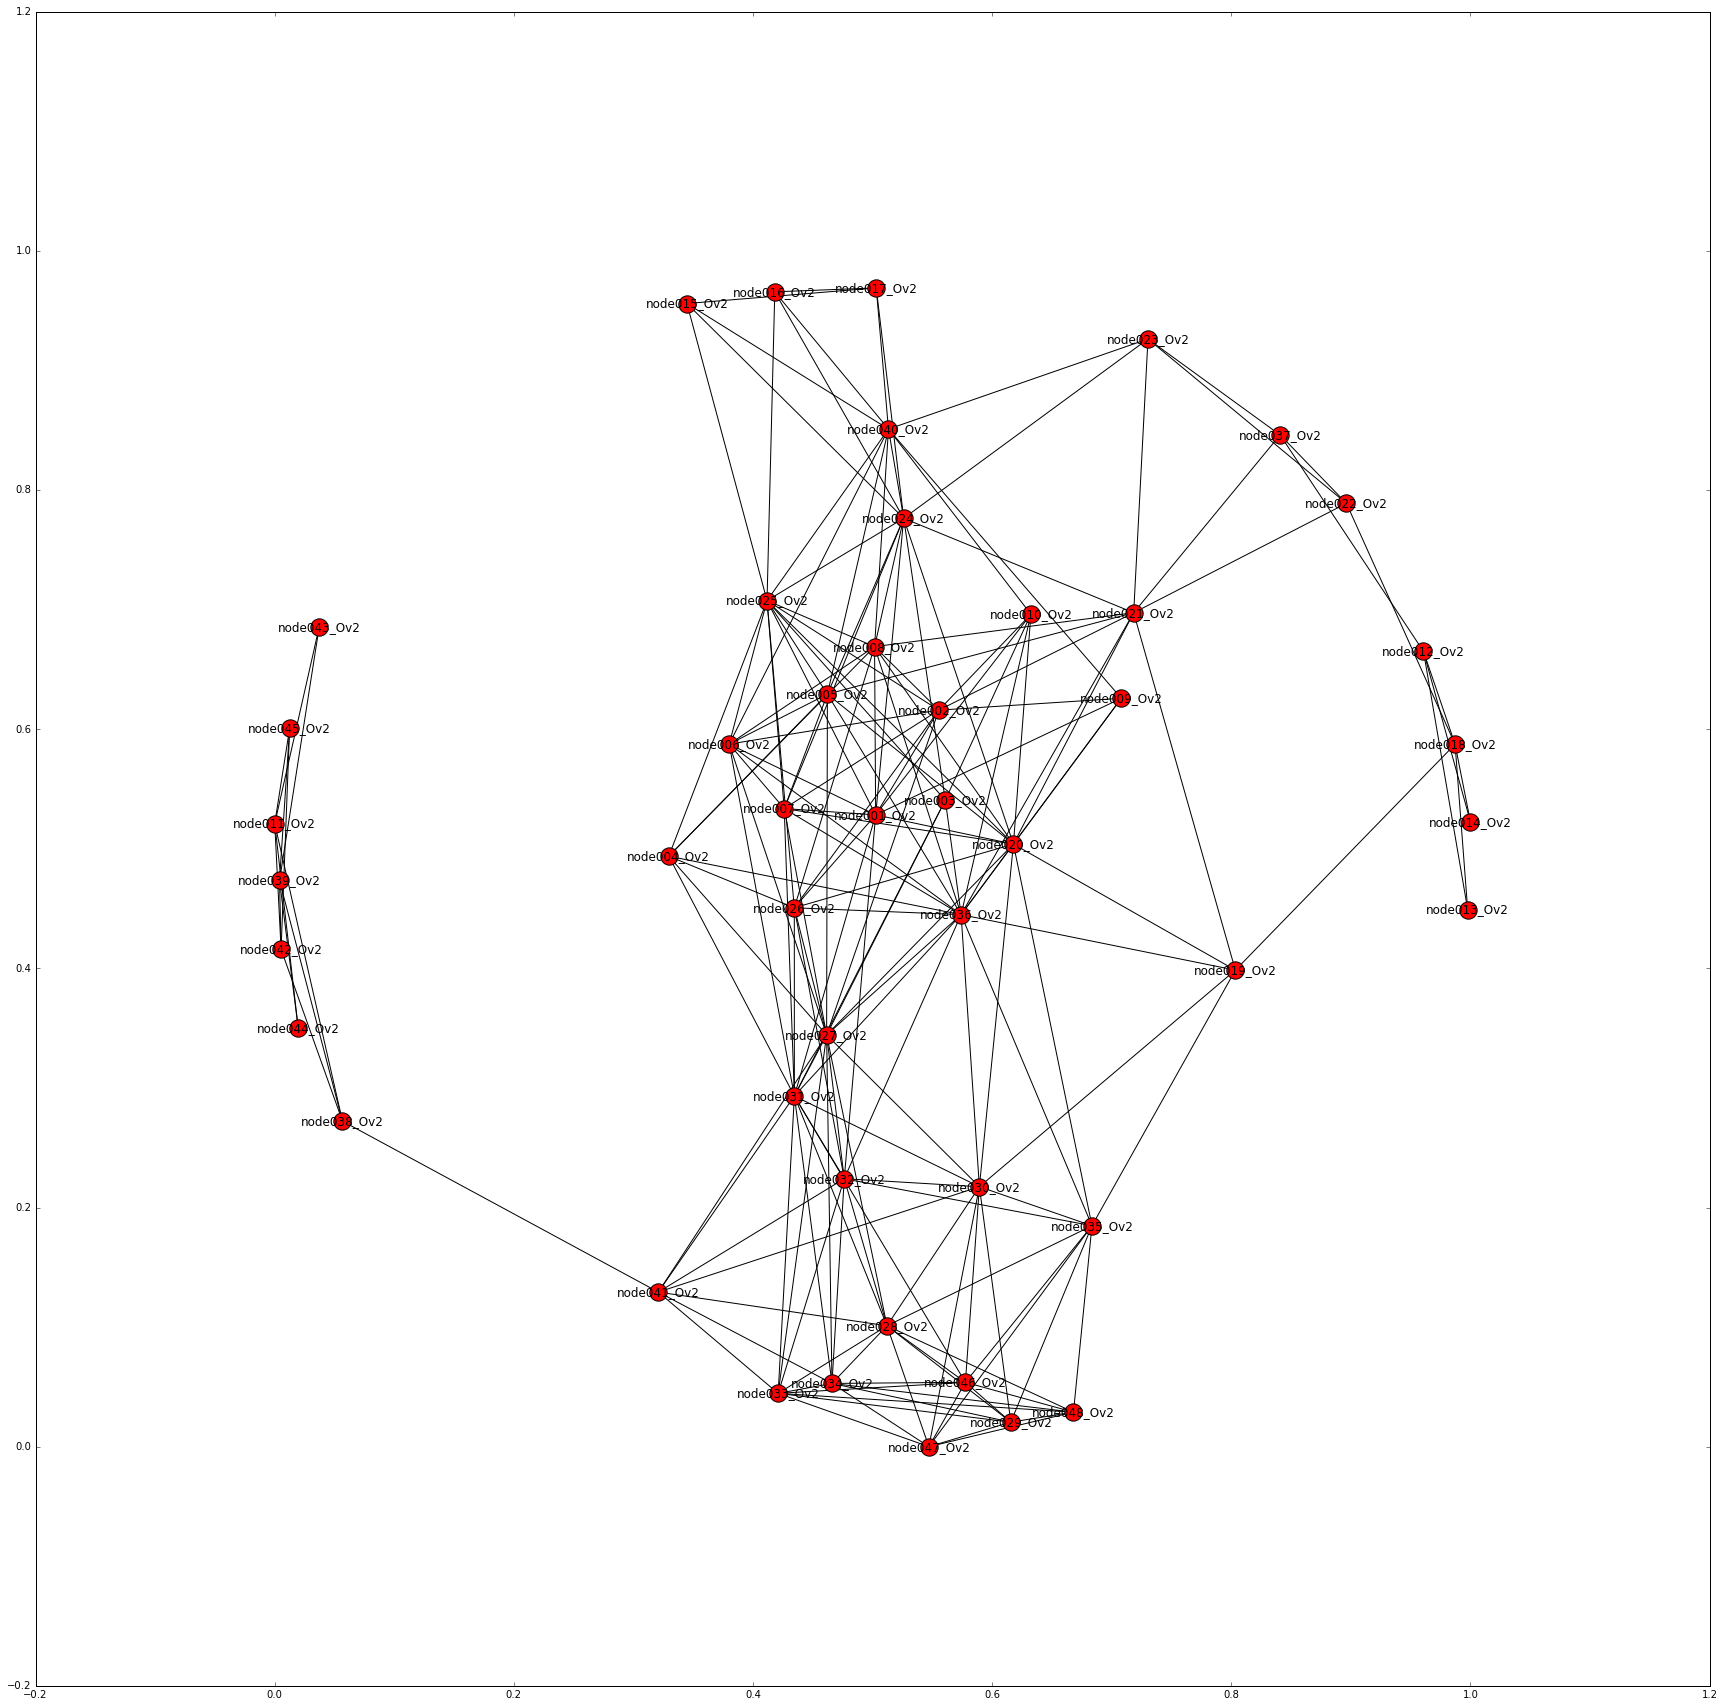

In [7]:
fig = plt.figure(figsize=(30,30), dpi=200)
G = nx.read_graphml('scenarios/48topo_static/48node_00005.graphml')
nx.draw_networkx(G)

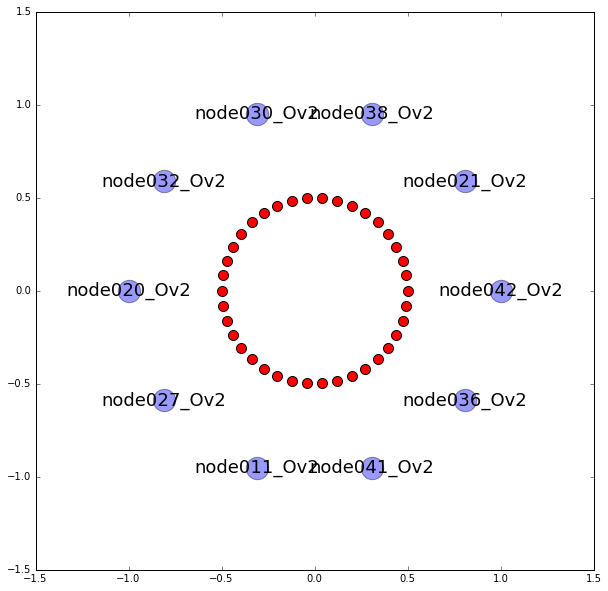

In [16]:
cent_temporal_stats={}
cent_matrix=np.array(centrality)
i=0
for name in sorted(G.nodes()):
    cent_temporal_stats[name]=np.average(cent_matrix[:,i])
    i=i+1
import collections
topn = dict(collections.Counter(cent_temporal_stats).most_common(10))
outer = topn.keys()
inner = [node for node in G.nodes() if node not in outer]
labels={}
for node in outer:
    labels[node]=node
shell = [inner,outer]
fig = plt.figure(figsize=(10,10), dpi=75)
pos = nx.shell_layout(G,shell)
nx.draw_networkx_nodes(G,pos,nodelist=outer,node_color='blue',node_size=500,alpha=0.4)
nx.draw_networkx_labels(G,pos,nodelist=outer,labels=labels,font_size=18)
nx.draw_networkx_nodes(G,pos,nodelist=inner,node_color='red',node_size=100)

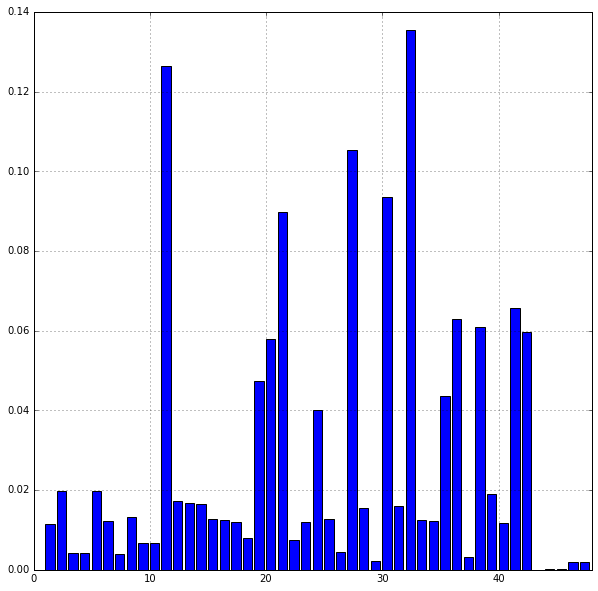

In [34]:
fig = plt.figure(figsize=(10,10), dpi=75)
x=[]
y=[]
for i in range(1,len(G.nodes())+1):
    x.append(i)
    y.append(np.average(cent_matrix[:,i-1]))
plt.bar(x,y)
plt.xlim(0,len(G.nodes()))
plt.ylim(0)
plt.grid()